Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

Creating Data frames

In [2]:
df = pd.read_csv("C:/Users/ykott/Desktop/spam.csv", encoding="latin-1", usecols= ["v1", "v2"])
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.columns=["category", "Message"]
df

,category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.describe()

,category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df_data= df.where((pd.notnull(df)),'')

In [7]:
df_data.head(5)

,category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Label Encoding


spam = 0
ham = 1

In [8]:
df_data.loc[df_data['category']=='spam','category',]=0
df_data.loc[df_data['category']=='ham','category',]=1

In [9]:
df_data.shape

(5572, 2)

Data visualisation

C:\Users\ykott\AppData\Local\Temp\ipykernel_5428\2207113521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="category", data=df, palette="YlGnBu")


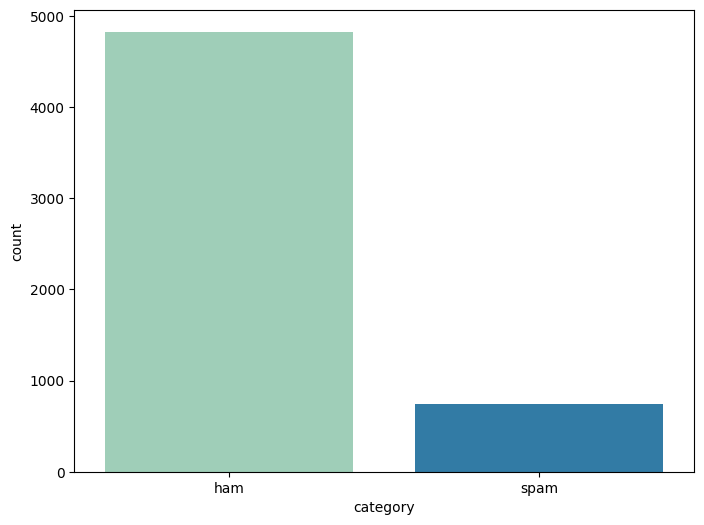

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="category", data=df, palette="YlGnBu")
plt.show()

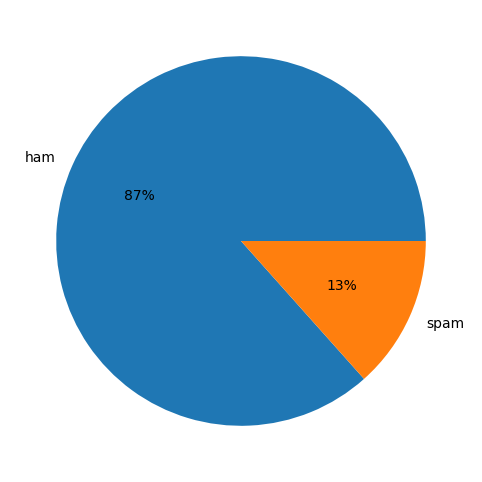

In [11]:
plt.figure(figsize=(8, 6))
kind_counts = df["category"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

In [12]:
#separating the data as texts and label
X=df_data['Message']
Y=df_data['category']

Splitting data into training data and test data

In [13]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [14]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(5572,)
(1115,)
(4457,)


Feature Extraction


In [15]:
#Transform the text data to feature vectors that can be used as input to the logistic regression
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english')

X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

#convert Y_train and Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [16]:
print(X_train_features)

  (0, 3877)	0.3448158131502806
  (0, 5465)	0.44795758315575157
  (0, 7080)	0.31970343948620417
  (0, 6574)	0.4183969454075648
  (0, 3709)	0.6349565068168678
  (1, 4669)	0.17695724732643836
  (1, 3028)	0.2022812962733575
  (1, 5446)	0.3069807910547827
  (1, 1870)	0.14977213475303497
  (1, 3366)	0.292689185468261
  (1, 6659)	0.16011652382475294
  (1, 6498)	0.24689279119624127
  (1, 3766)	0.26825752434656064
  (1, 1713)	0.2825491299330823
  (1, 2793)	0.258117468811382
  (1, 1615)	0.20816952448801926
  (1, 6668)	0.20051855715776767
  (1, 7363)	0.20319686557678182
  (1, 5023)	0.19570461968192035
  (1, 7158)	0.20609554770919086
  (1, 4420)	0.1853775746559901
  (1, 1419)	0.253965918760039
  (1, 6439)	0.2022812962733575
  (1, 831)	0.21657290185987918
  (1, 6575)	0.1677095796164785
  :	:
  (4449, 6905)	0.11488086890794962
  (4449, 5775)	0.1281983829778891
  (4450, 3907)	0.7419222528800465
  (4450, 3394)	0.6704859213148299
  (4451, 6449)	0.7785157619297159
  (4451, 2406)	0.6276250540147309
  (44

Training the Model


Logistic regression

In [17]:
model=LogisticRegression()

In [18]:
#Training the Logistic Regression model with the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluating the trained model


In [19]:
#pridiction on training data

pred_training_data=model.predict(X_train_features)
accuracy_score_training_data=accuracy_score(Y_train,pred_training_data)

In [20]:
print("Accuracy on training data :",accuracy_score_training_data)

Accuracy on training data : 0.9690374691496523


In [21]:
pred_testing_data=model.predict(X_test_features)
accuracy_score_testing_data=accuracy_score(Y_test,pred_testing_data)
print("Accuracy on testing data :",accuracy_score_testing_data)

Accuracy on testing data : 0.9713004484304932


Building a Pridictive system

In [22]:
email=["Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"]

#convert text to feature vectors 
input_features= feature_extraction.transform(email)

#making prediction 
prediction = model.predict(input_features)
print(prediction)

if prediction[0]==1:
    print('ham mail')
else:
    print('Spam mail')

[0]
Spam mail
